## Maximum likelihood estimation in R - a toy example

Imagine we have a sample of $n$ coin flips (represented by the number of heads we got), but we don't know how "fair" the coin is. We can understand "fairness" by a parameter $p$, which describes how likely we are to observe a head in a single coinflip. For example, a fair coin flip would be expected to result in head 50% of the time, $p$ = 0.5.

Our goal is: given a series of observed coin flips, what is the most likely "hidden" value of $p$?

Let's simulate 100 coin flips, using a coin which is expected to result in observing a head with probability of $p$ = 0.3 (that's quit an unfair coin!). This will be our data set.

In [1]:
# the true, unknown "fairness" of the coin
p <- 0.3

# total number of coinflips
n_coinflips <- 100

In [2]:
(coinflips <- sample(c("H", "T"), size = n_coinflips, replace = TRUE, prob = c(p, 1 - p)))

[1] "H" "T" "T" "H" "T" "T" "T" "T" "T" "T" "T" "T" "H" "T" "T" "T" "H" "H"
 [19] "T" "T" "H" "H" "H" "T" "T" "T" "T" "H" "T" "T" "T" "T" "T" "T" "H" "T"
 [37] "T" "T" "T" "T" "H" "H" "T" "T" "T" "H" "T" "T" "T" "T" "T" "H" "T" "H"
 [55] "T" "T" "H" "T" "H" "T" "H" "T" "T" "T" "T" "T" "T" "T" "T" "T" "T" "T"
 [73] "H" "T" "T" "T" "H" "H" "T" "T" "T" "T" "T" "H" "T" "H" "T" "T" "T" "T"
 [91] "T" "T" "H" "T" "T" "T" "T" "H" "T" "H"

In [3]:
(n_heads <- sum(coinflips == "H"))

[1] 26

How can we recover the $p$ if we are given just the number of heads, `n_heads`?

## Solution - maximum likelihood method (MLE)

Let's load some packages first:

In [4]:
library(tidyverse)
library(bdkn)

── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──
✔ ggplot2 3.0.0     ✔ purrr   0.2.5
✔ tibble  1.4.2     ✔ dplyr   0.7.8
✔ tidyr   0.8.2     ✔ stringr 1.3.1
✔ readr   1.2.1     ✔ forcats 0.3.0
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Attaching package: ‘bdkn’

The following object is masked from ‘package:ggplot2’:

    %+%



### Finding the MLE using grid search

We will calculate and compare likelihoods of uniformly sampled values of $p$ using the binomial density function.

In [5]:
# a 1D "grid" of parameter values to explore
param <- seq(0, 1, length.out = 100)

# likelihoods of the "grid points" given the observed number of heads
likelihoods <- map_dbl(param, ~ dbinom(n_heads, n_coinflips, .x))

In [6]:
param[which.max(likelihoods)]

[1] 0.2626263

#### Finding the MLE using the optimization algorithm:

We will use the `optimization` function which searches a given interval to find the minimum of some function $f$ with respect to its first argument. In this case, our function of interest is the binomial density function.

In [7]:
# Likelihood function to minimize - negative binomial density of p given:
#   - data: counts of heads
#   - n: number of coin flips
negLL <- function(data, n, p) {
    -dbinom(data, n, p, log = TRUE)
}

In [8]:
res <- optimize(negLL, interval=c(0, 1), data = n_heads, n = n_coinflips)

The `optimize` function returns a list with two elements. The `minimum` element contains the value of $p$ which resulted in a highest likelihood of the `negLL` function.

In [9]:
res$minimum

[1] 0.2600111

## Plotting MLE results of both methods

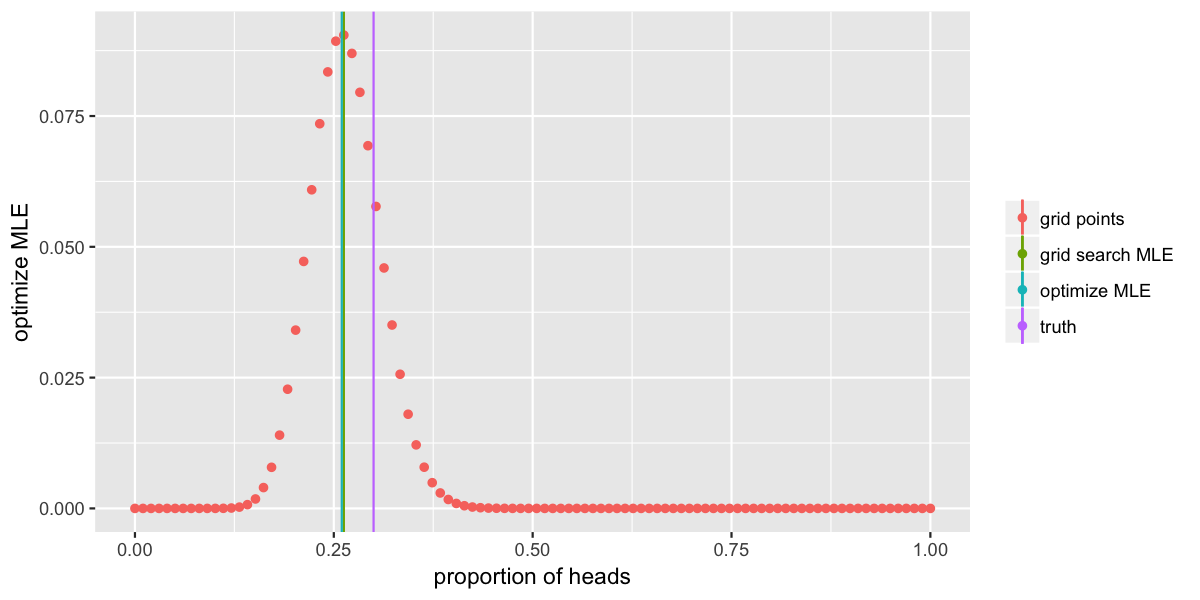

In [10]:
set_dim(8, 4, 150)

ggplot() +
    geom_point(aes(param, likelihoods, color = "grid points")) +
    geom_vline(aes(xintercept = param[which.max(likelihoods)], color = "grid search MLE")) +
    geom_vline(aes(xintercept = res$minimum, color = "optimize MLE")) +
    geom_vline(aes(xintercept = p, color = "truth")) +
    labs(x = "proportion of heads", y = "grid search MLE") +
    labs(x = "proportion of heads", y = "optimize MLE") +
    theme(legend.title = element_blank())

## Caution

In the example above, both of our MLE results got reasonably to the truth. However, our confidence in the MLE result will largely depend on the number of coinflips in our experiment. For example, flipping a perfectly fair coin only ten times can easily produce 7 heads out of 10, and the naive MLE approach (which is essentially a single value) could lead us to believe that the coin is probably loaded.